In [1]:
from packages.loaders import DataLoader
from src.packages.path_storage import PathStorage
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import time

train_x = DataLoader.load_numpy_array(PathStorage.get_path_to_data() / 'perceptron' / "train_x_sparse_for_perceptron.npy")
train_y = DataLoader.load_numpy_array(PathStorage.get_path_to_data() / 'perceptron' / "train_y_sparse_for_perceptron.npy")

train_x.shape, train_y.shape

((2736,), (2736, 58))

In [2]:
from scipy.sparse import vstack
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras import Input

train_x = vstack(train_x)
sparse_tensor_train = tf.sparse.SparseTensor(
    indices=list(zip(*train_x.nonzero())),  # индексы ненулевых элементов
    values=train_x.data,  # значения ненулевых элементов
    dense_shape=train_x.shape  # размерность разреженной матрицы
)
sparse_tensor_train = tf.sparse.reorder(sparse_tensor_train)

sparse_tensor_train

SparseTensor(indices=tf.Tensor(
[[   0  162]
 [   0  180]
 [   0  224]
 ...
 [2734 1626]
 [2735 1104]
 [2735 1149]], shape=(13824, 2), dtype=int64), values=tf.Tensor([0.31785649 0.31785649 0.31785649 ... 0.70710678 0.70710678 0.70710678], shape=(13824,), dtype=float64), dense_shape=tf.Tensor([2736 1649], shape=(2,), dtype=int64))

In [3]:
INPUT_SHAPE = train_x.shape[1]
OUTPUT_SHAPE = train_y.shape[1]

INPUT_SHAPE, OUTPUT_SHAPE

(1649, 58)

In [4]:
start = time.time()

model_0 = Sequential()

model_0.add(Input(shape=(INPUT_SHAPE,), sparse=True))
model_0.add(Dense(128, activation='relu'))
model_0.add(Dropout(0.4))
model_0.add(Dense(64, activation='relu'))
model_0.add(Dropout(0.4))
model_0.add(Dense(OUTPUT_SHAPE, activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_0.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history_training_0 = model_0.fit(sparse_tensor_train, train_y, epochs=40, batch_size=5)

total_pred_time = time.time() - start
print(total_pred_time)

Epoch 1/40
548/548 [==============================] - 1s 846us/step - loss: 4.0103 - accuracy: 0.0376
Epoch 2/40
548/548 [==============================] - 0s 831us/step - loss: 3.8191 - accuracy: 0.0844
Epoch 3/40
548/548 [==============================] - 0s 805us/step - loss: 3.2485 - accuracy: 0.1996
Epoch 4/40
548/548 [==============================] - 0s 861us/step - loss: 2.5955 - accuracy: 0.3180
Epoch 5/40
548/548 [==============================] - 0s 841us/step - loss: 2.1033 - accuracy: 0.4342
Epoch 6/40
548/548 [==============================] - 0s 856us/step - loss: 1.7171 - accuracy: 0.5230
Epoch 7/40
548/548 [==============================] - 0s 786us/step - loss: 1.4510 - accuracy: 0.5789
Epoch 8/40
548/548 [==============================] - 0s 776us/step - loss: 1.2401 - accuracy: 0.6290
Epoch 9/40
548/548 [==============================] - 0s 843us/step - loss: 1.0927 - accuracy: 0.6615
Epoch 10/40
548/548 [==============================] - 0s 770us/step - loss: 0.955

In [5]:
start = time.time()

model = Sequential()

model.add(Input(shape=(INPUT_SHAPE,), sparse=True))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(OUTPUT_SHAPE, activation='softmax'))

early_stop = EarlyStopping(monitor='loss', min_delta=0.05, patience=10, restore_best_weights=True)
optimizer  = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

history_training = model.fit(sparse_tensor_train, train_y, epochs=100, batch_size=25, callbacks=[early_stop])

total_pred_time = time.time() - start
print(total_pred_time)

Epoch 1/100
110/110 [==============================] - 1s 1ms/step - loss: 2.9289 - accuracy: 0.3103
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 1.5058 - accuracy: 0.6221
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 1.0697 - accuracy: 0.7281
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 0.7966 - accuracy: 0.7950
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.8311
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.8538
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.8790
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.9017
Epoch 9/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.9174
Epoch 10/100
110/110 [==============================] - 0s 1ms/step - loss: 0.2881 - accura

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

def draw_plot(data, type_data):
    plt.figure(figsize=(25, 5))
    plt.plot(data, 'darkorange', label='Train')
    plt.xlabel('Epoch')
    plt.ylabel(type_data)
    plt.legend()

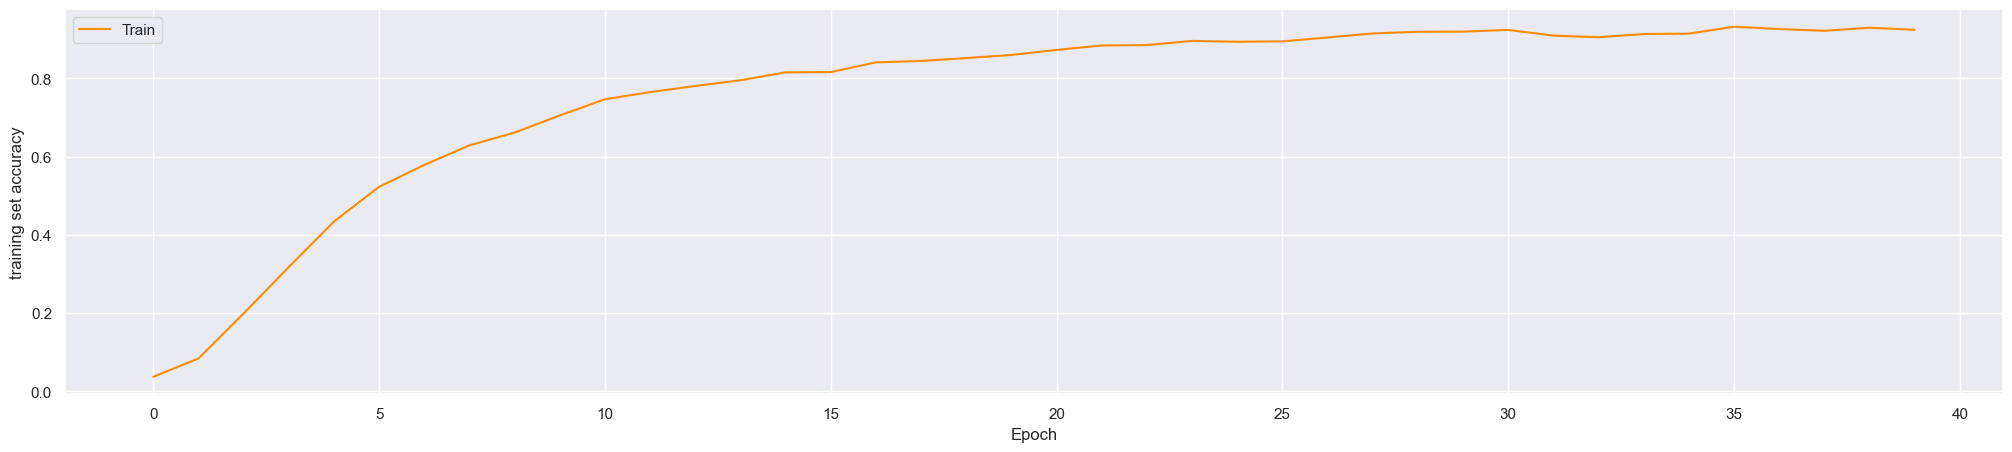

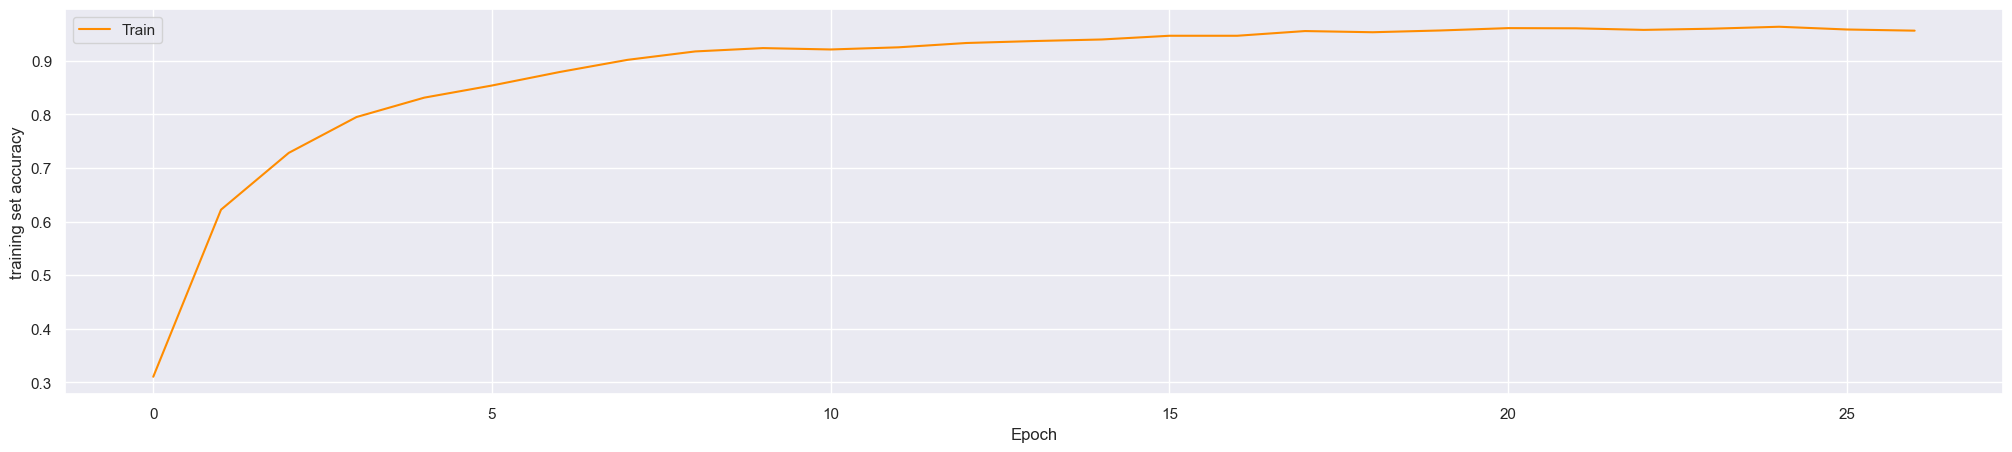

In [7]:
draw_plot(history_training_0.history['accuracy'], 'training set accuracy')
draw_plot(history_training.history['accuracy'], 'training set accuracy')

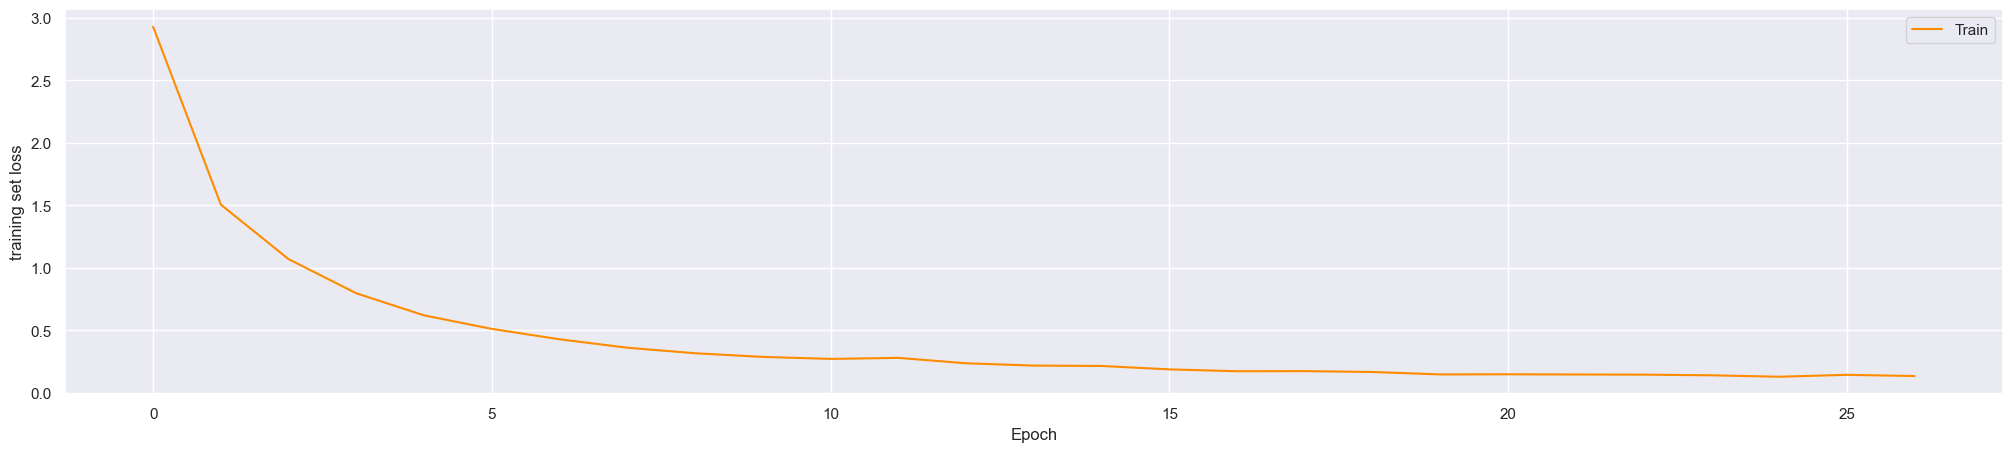

In [8]:
draw_plot(history_training_0.history['loss'], 'training set loss')
draw_plot(history_training.history['loss'], 'training set loss')

In [9]:
model.save(PathStorage.get_path_to_models() / "perceptron" / "perceptron.h5")